# Men Classification Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plt.style.use('seaborn-poster')
%matplotlib inline

The data contains the count of items of a particular category bought per year by a costumer.

In [2]:
# import the data
data = pd.read_csv("men_basket.csv")

# only print the first 10 samples
print(data.head())
print(f'We have {data.shape[0]} data samples with {data.shape[1] - 1} features')

   beer  cookies   pizza  wine    label
0  55.0     23.0  15.000  13.0  partner
1  65.0     30.0  19.500  20.0   single
2  68.0     32.0  22.125  23.0   single
3  57.0     26.0  13.125  10.0  partner
4  73.0     29.0  23.625  18.0   single
We have 100 data samples with 4 features


Report some descriptive statistics and print labels

In [3]:
print(data.describe())
data['label'].unique()

             beer    cookies       pizza        wine
count  100.000000  100.00000  100.000000  100.000000
mean    62.620000   28.72000   18.397500   16.760000
std      6.628344    3.32751    3.095919    4.247685
min     49.000000   20.00000   11.250000   10.000000
25%     58.000000   27.00000   16.406250   13.000000
50%     63.000000   29.00000   18.375000   16.000000
75%     67.000000   30.25000   20.718750   20.000000
max     79.000000   38.00000   25.875000   25.000000


array(['partner', 'single'], dtype=object)

No handles with labels found to put in legend.


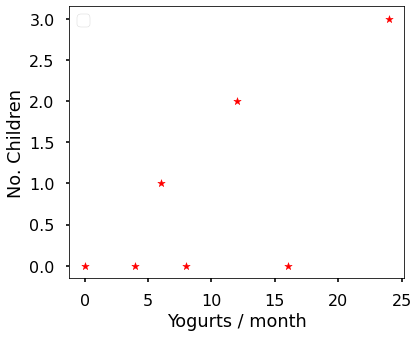

In [14]:
#X = data[["beer", "pizza"]]
#y = data["label"]
data = pd.DataFrame({'Yogurt': [0, 8, 16, 12, 6, 24, 4], 'Nutella': [5, 0, 0, 7, 3, 4, 1], 'Children': [0, 0, 0, 2, 1, 3, 0]})

colors = ['g', 'r']
symbols = ['^', '*']
plt.figure(figsize = (6,5))

plt.scatter(data["Yogurt"], data["Children"], \
            color = c, marker = s, s = 60)

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel("Yogurts / month")
plt.ylabel("No. Children")
plt.show()

If possible, we would like to explore the data before modeling.  
The boundary between the classes seems to be almost linear. That should tell us the type of model we want to use to separete ('classify') this samples. 

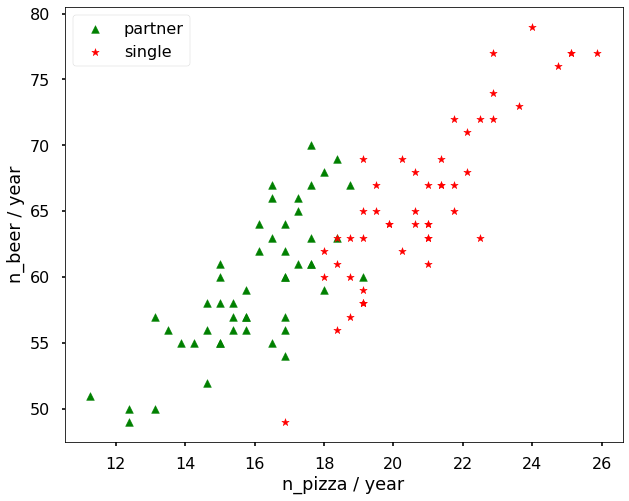

In [5]:
# let's have a look of the data first
colors = ['g', 'r']
symbols = ['^', '*']
plt.figure(figsize = (10,8))

for l, c, s in (zip(y.unique(), colors, symbols)):
    plt.scatter(X["pizza"][y == l], X["beer"][y == l], \
                color = c, marker = s, s = 60, \
                label = l)

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel("n_pizza / year")
plt.ylabel("n_beer / year")
plt.show()

We will use now a model from scikit-learn called NaiveBayes. You can read more about it at:  
https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes


The API is similar for most algorithms in scikit-learn:  
**Step 1:** initialize the model  
**Step 2:** train the model using the *fit* function  
**Step 3:** predict using the *predict* function  

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier model
clf = GaussianNB()

# Train the classifier with data
clf.fit(X,y)

# predict on the data
y_hat = clf.predict(X)
print(y_hat)

We plot the decision boundary for the model

In [ ]:
# Plotting decision regions

x_min, x_max = X["pizza"].min() - 1, X["pizza"].max() + 1
y_min, y_max = X["beer"].min() - 1, X["beer"].max() + 1   
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize = (10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.3)

for l, c, s in (zip(y.unique(), colors, symbols)):
    plt.scatter(X["pizza"][y == l], X["beer"][y == l], \
                color = c, marker = s, s = 60, \
                label = l)

plt.title("Men Classification")

plt.xlabel('n_pizza')
plt.ylabel('n_beer')
plt.show()


The linear boundary found by the model is good, as it can separete most of the samples.  
How could you report 'how good' the model is?